In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbody import *
from numba import set_num_threads

In [2]:
nparticles = 100
steps = 1000
dt = 0.01
tmax = steps * dt
G = 1.0
rsoft = 0.01

In [3]:
particles = Particles(N=nparticles)

In [4]:
total_mass = 20
particles.masses = np.ones((nparticles, 1))
particles.masses = total_mass * particles.masses / nparticles
# print(particles.masses)

np.random.seed(46)
particles.positions = np.random.rand(nparticles, 3)
particles.velocities = np.zeros((nparticles, 3))
particles.tags = np.linspace(1, nparticles, nparticles)

In [5]:
# print(particles.positions)
# print(particles.velocities)
mean = np.mean(particles.positions, axis=0)
std = np.std(particles.positions, axis=0)
particles.positions = (particles.positions - mean) / std
# print(particles.positions)


In [6]:
# particles.draw(dim=3)

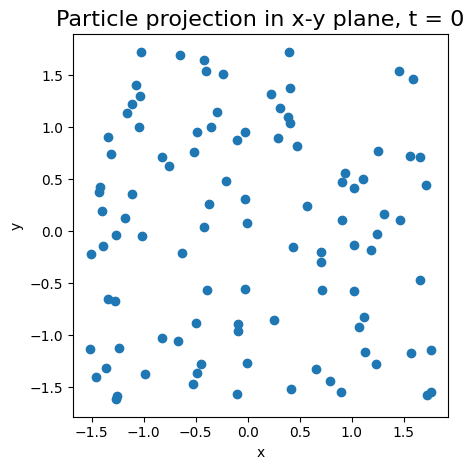

Time:  0 ; Total time:  10.0
Step:  0 ; Total steps:  1000



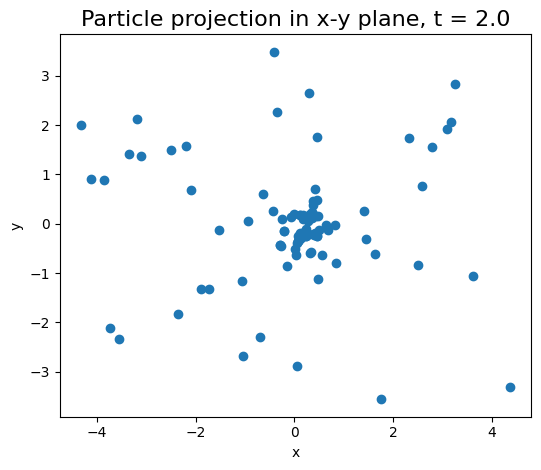

Time:  2.0000000000000013 ; Total time:  10.0
Step:  200 ; Total steps:  1000



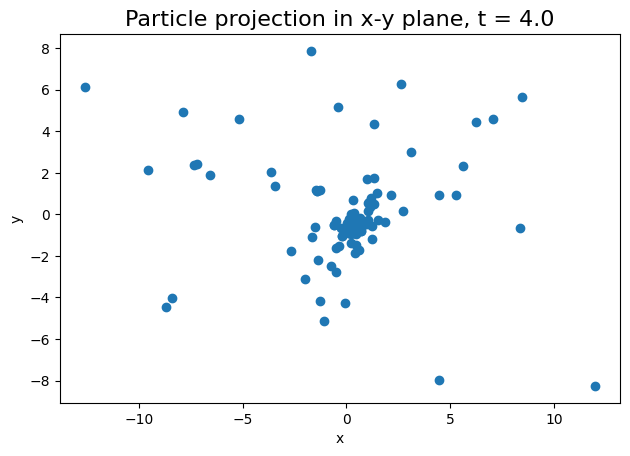

Time:  3.9999999999999587 ; Total time:  10.0
Step:  400 ; Total steps:  1000



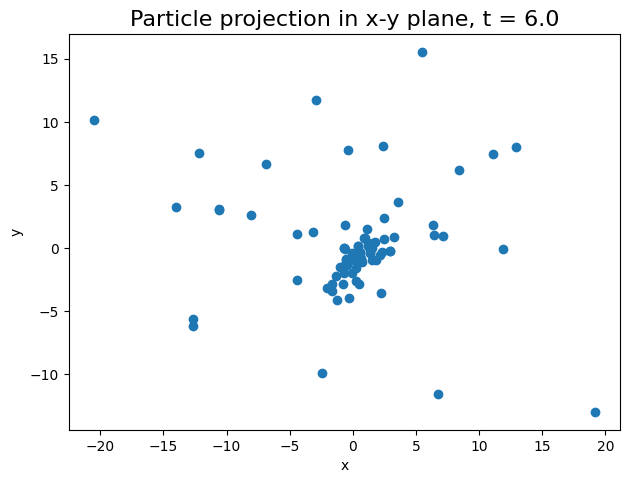

Time:  5.9999999999999165 ; Total time:  10.0
Step:  600 ; Total steps:  1000



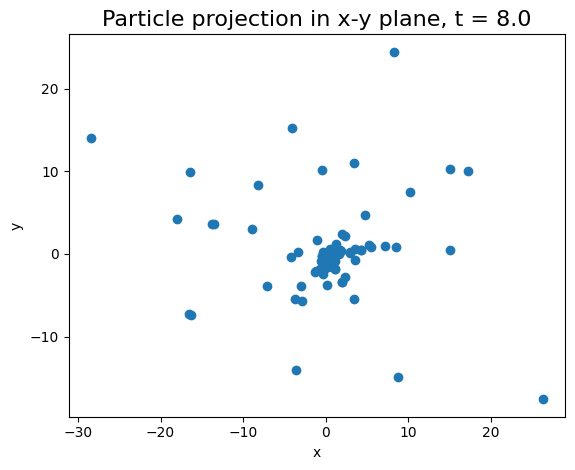

Time:  7.999999999999874 ; Total time:  10.0
Step:  800 ; Total steps:  1000



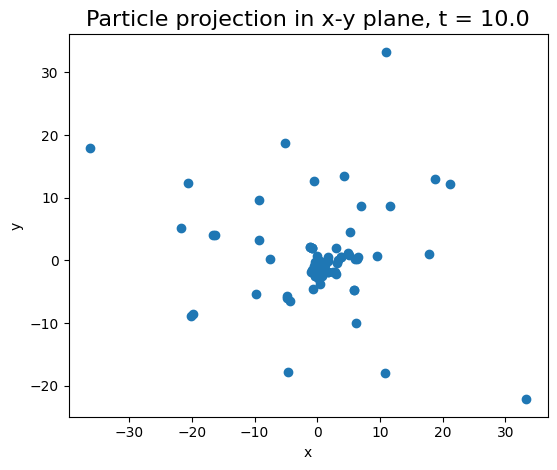

Time:  10.0 ; Total time:  10.0
Step:  1000 ; Total steps:  1000

Simulation is done!


In [7]:
set_num_threads(4)
simulation = NBodySimulator(particles)
simulation.setup(G=G, rsoft=rsoft, method="RK4", 
                 io_freq=200, io_header="nbody", io_screen=True, visualization=True)
simulation.evolve(dt=dt, tmax=tmax)